# Homework 5

### Question 1

In [143]:
import pandas as pd

mpg = pd.read_csv('mpg.csv')

mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


The equivalent of the describe() function from Python in R is the summary() function. 

### Question 2

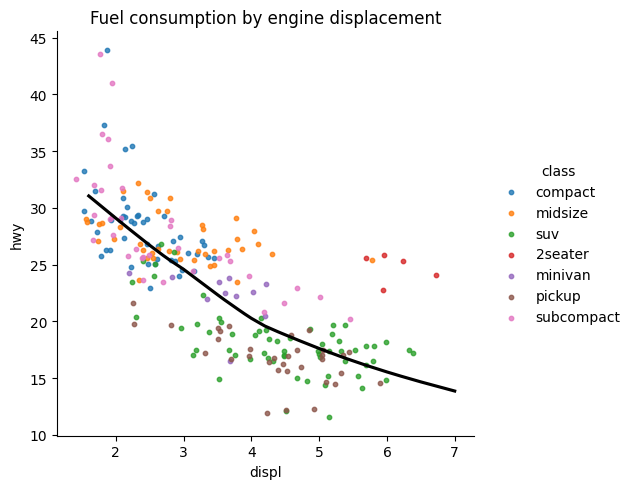

In [141]:
import seaborn as sns
import pandas as pd

mpg = pd.read_csv('mpg.csv')

lm_plot = sns.lmplot(
    data = mpg,
    x = "displ",
    y = "hwy",
    hue = "class",
    fit_reg = False,
    scatter_kws = {"s": 10},
    ci = None,
    x_jitter = 0.5,
    y_jitter = 0.5
).set(
    title = "Fuel consumption by engine displacement",
    xlabel = "Engine displacement",
    ylabel = "Fuel consumption"
).tight_layout()

_ = sns.regplot(
    data = mpg,
    x = "displ",
    y = "hwy",
    scatter = False,
    ax = lm_plot.ax,
    line_kws = {"color": "black"},
    lowess = True
)

### Question 3

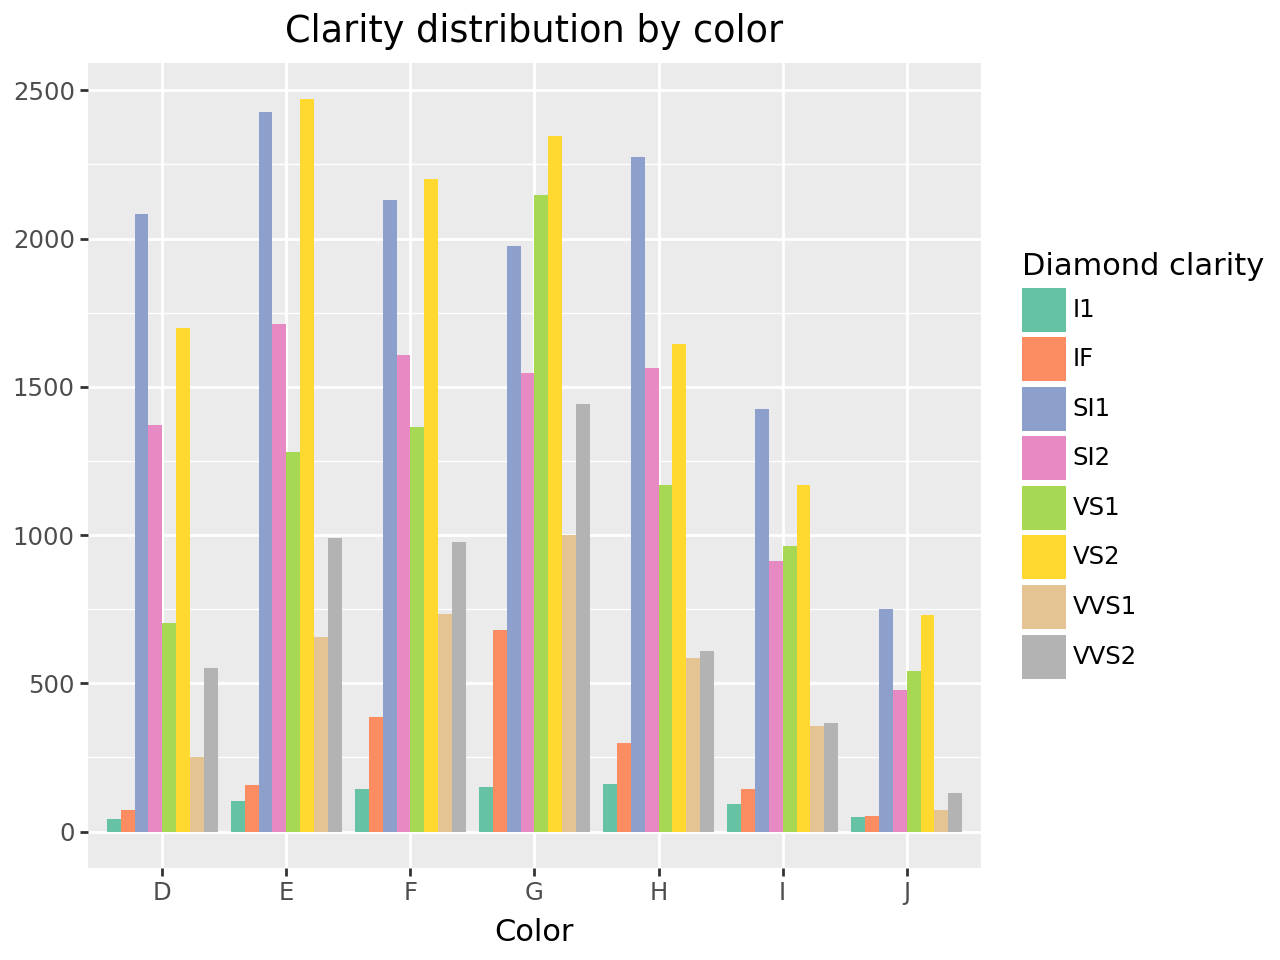

In [148]:
import pandas as pd
from plotnine import aes, geom_jitter, geom_smooth, geom_bar, ggplot, ggtitle, xlab, ylab, scale_fill_brewer, scale_fill_discrete

diamonds = pd.read_csv('diamonds.csv')

(
    ggplot(data = diamonds, mapping = aes(x = "color", fill = "pd.Categorical(clarity)")) +
     geom_bar(position = "dodge") +
     scale_fill_brewer(type = "qual", palette = "Set2", name = "Diamond clarity") +
     xlab("Color") +
     ylab("") +
     ggtitle("Clarity distribution by color")
)

### Question 4

HW2 Exercise 1

In [134]:
import pandas as pd

flights = pd.read_csv('flights.csv')

(
    flights
    .query("month >= 7 & month <= 11")
    .assign(gain = flights["arr_delay"] - flights["dep_delay"])
    .groupby("carrier")
    .agg(average_gain = ("gain", "mean"))
    .rename(columns = {"average_gain": "average_gain"})
    .sort_values("average_gain", ascending = False)
)

,average_gain
carrier,
FL,1.285235
F9,0.545455
MQ,0.063590
HA,-0.909774
US,-2.837182
OO,-2.846154
YV,-3.017921
B6,-4.905070
EV,-5.787007


HW2 Exercise 4

In [139]:
import pandas as pd

transactions = pd.read_csv('transactions.csv')
cols_to_keep = ["month"]

(
    transactions
    .melt(id_vars = ["person", "month"], value_vars = ["purchase", "sale"], var_name = "transaction_type", value_name = "amount")
    .query("person == 'jenna' | person == 'john'")
    .drop_duplicates(subset = ['month'])
    [cols_to_keep]
    .reset_index(drop = True)
)

,month
0,1
1,3


### Question 5

HW3 Exercise 1

In [124]:
import pandas as pd

persons = pd.read_csv('persons.csv')
food = pd.read_csv('food.csv')
drinks = pd.read_csv('drinks.csv')
dinners = pd.read_csv('dinners.csv')
cols_to_keep = ["drink", "drink_price", "food", "food_price", "first_name", "last_name", "age"]

dinners_explicit = (
    dinners
    .merge(drinks, left_on = 'drink_id', right_on = 'item_id', how = 'left')
    .rename(columns = {
        'price': 'drink_price',
        'item_name': 'drink'
    })
    .merge(food, left_on = 'food_id', right_on = 'food_id', how = 'left')
    .rename(columns = {
        'price': 'food_price',
        'name': 'food'
    })
    .merge(persons, left_on = 'person_id', right_on = 'id', how = 'left')
    [cols_to_keep]
)
dinners_explicit

,drink,drink_price,food,food_price,first_name,last_name,age
0,NaN,NaN,pasta,$8.50,Valter,Evangelista,34.0
1,NaN,NaN,ice cream,$4.50,Polly,Verity,61.0
2,water,$1.00,NaN,NaN,NaN,NaN,NaN
3,beer,$5.00,cake,$4.50,Aysha,Freitas,55.0
4,NaN,NaN,pizza,$12,Rayno,Van Kann,29.0
5,water,$1.00,fish,$15.00,Valter,Evangelista,34.0
6,NaN,NaN,pizza,$12,Rayno,Van Kann,29.0
7,sparkling water,$2.00,ice cream,$4.50,Ksenya,Dunai,31.0
8,soda,$2.50,pop corn,$1.50,Polly,Verity,61.0
9,water,$1.00,salad,$5.00,Aysha,Freitas,55.0


HW3 Exercise 2 - Top 2 Drinks

In [122]:
import pandas as pd

(
    dinners_explicit
    .groupby('drink').size()
    .sort_values(ascending = False)
    .head(2)
)

drink
soda               9
sparkling water    8
dtype: int64

HW3 Exercise 2 - Top 2 Foods

In [123]:
import pandas as pd

(
    dinners_explicit
    .groupby('food').size()
    .sort_values(ascending = False)
    .head(2)
)

food
pizza    7
fries    6
dtype: int64